Смирнов Николай. Практическое задание. Экзамен. Вар 29. PCA, Threshold method

In [7]:
import pandas as pd

# Загрузка данных из файла Excel
data = pd.read_excel('24_MAG_Exam_Practice_29.xls')

In [8]:
data

,A,B,C,D,E,F,G
0,38,1,7500,9,7000,71000,1
1,38,2,31900,8,32000,319000,0
2,29,1,25000,3,23000,237000,0
3,54,4,23100,18,26000,249000,1
4,33,2,31800,5,31000,311000,0
...,...,...,...,...,...,...,...
65,30,1,19400,4,17000,182000,0
66,41,2,30500,10,31000,308000,0
67,44,3,21900,12,23000,224000,0
68,50,3,13800,16,16000,149000,1


A возраст, B количество иждивенцев, C доход, D срок проживания в регионе, E оценка автомобиля, F размер кредита, I видимо готовая кластеризация

<Axes: >

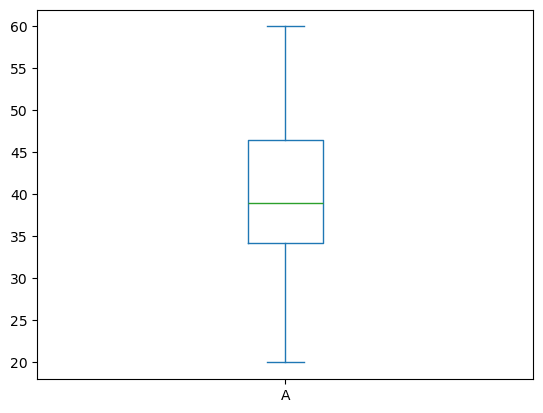

In [16]:
data['A'].plot(kind='box')

<Axes: >

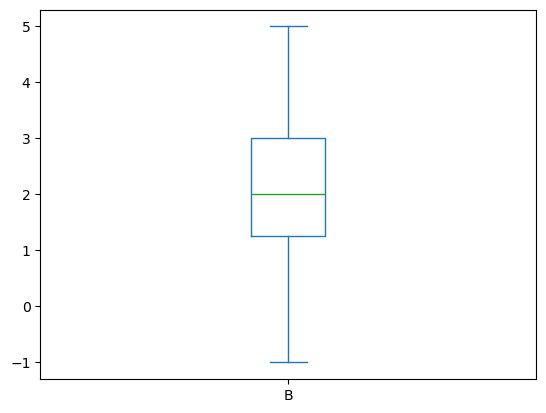

In [17]:
data['B'].plot(kind='box')

<Axes: >

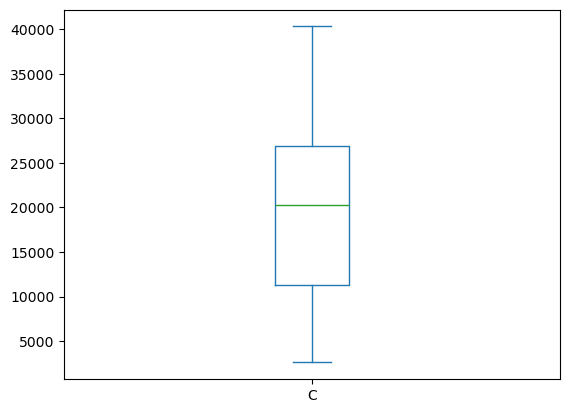

In [18]:
data['C'].plot(kind='box')

<Axes: >

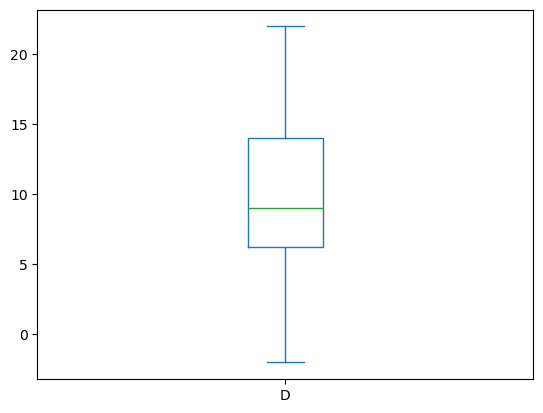

In [19]:
data['D'].plot(kind='box')

<Axes: >

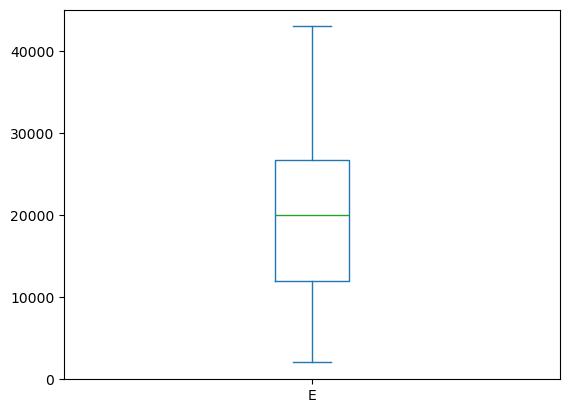

In [20]:
data['E'].plot(kind='box')

<Axes: >

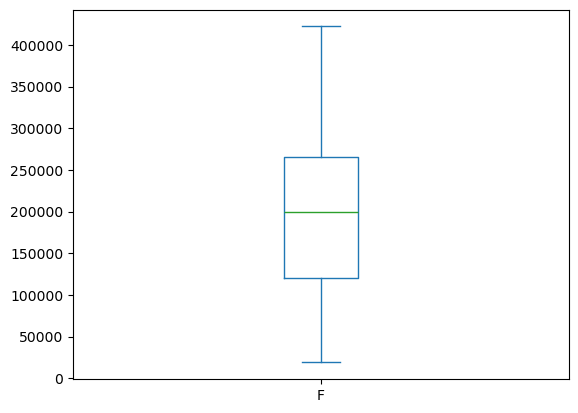

In [21]:
data['F'].plot(kind='box')

Выбросов нет.

In [24]:
I = data['G']
I

0     1
1     0
2     0
3     1
4     0
     ..
65    0
66    0
67    0
68    1
69    0
Name: G, Length: 70, dtype: int64

In [27]:
data = data.drop(['G'], axis=1)

array([[<Axes: title={'center': 'A'}>, <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'C'}>, <Axes: title={'center': 'D'}>],
       [<Axes: title={'center': 'E'}>, <Axes: title={'center': 'F'}>]],
      dtype=object)

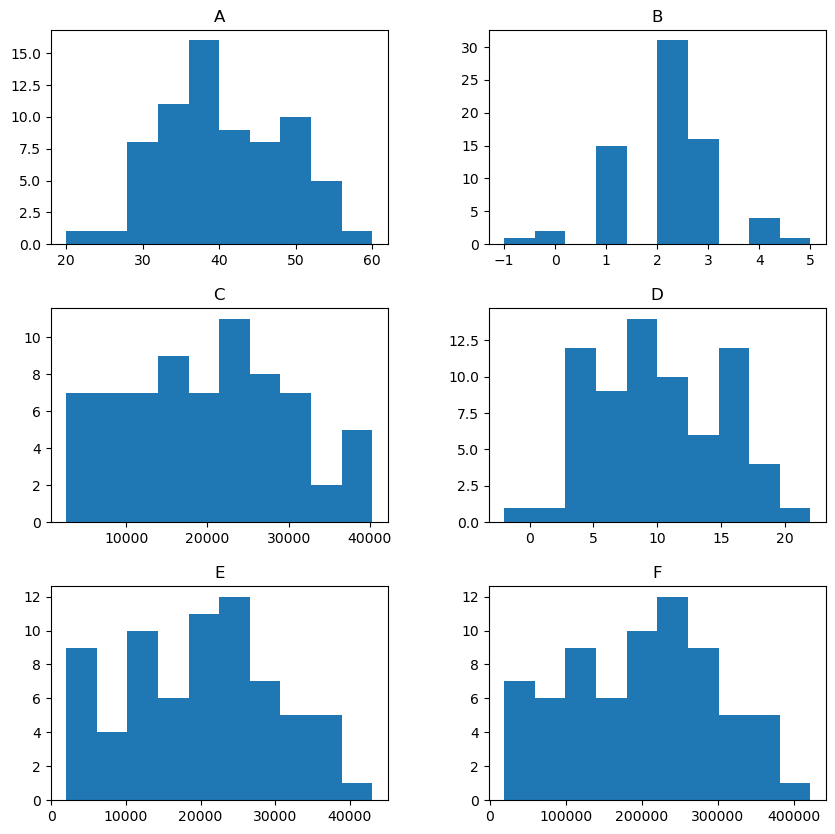

In [30]:
data.hist(bins=10, figsize=(10, 10), grid=False)

<Axes: >

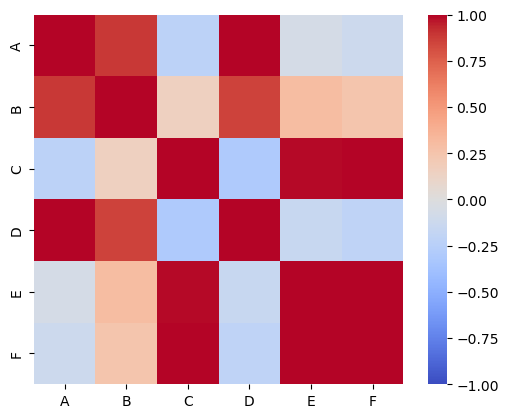

In [29]:
import seaborn as sns

corr_mat = data.corr()
sns.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='coolwarm')

Сильно коррелированы A B D и C E F

Здесь видно, что A и E - некоррелтрованы. То есть, если снижать размерность до двух, то они должны остаться. 

Нормируем

In [38]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler(with_mean=True, with_std=True)
Z = scaler.fit_transform(data)

data = pd.DataFrame(Z, columns=data.columns)

from sklearn.preprocessing import normalize
Z_norm = normalize(data, axis=0, norm="l2")
     
L, W = np.linalg.eig(Z_norm.T@Z_norm) 
L

array([3.16250017e+00, 2.78109206e+00, 5.34692932e-02, 2.49115404e-03,
       1.21946410e-05, 4.35119933e-04])

3.16250017 ≈ 3.16     
2.78109206 ≈ 2.78   
5.34692932e-02 ≈ 0.05     
2.49115404e-03 ≈ 0.00        
1.21946410e-05 ≈ 0.00      
4.35119933e-04 ≈ 0.00    

Ну тут я не совсем помню, как это интерпретировать, осьавлю признаки A и E

In [43]:
data = data.drop(['B', 'C', 'D', 'F'], axis=1)

In [49]:
labels = []
theshold = 100
for i in range(len(data)):
    if (data['A'][i]>data['E'][i]):
        labels.append(0)
    else: 
        labels.append(1)

labels

[0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1]

In [50]:
labels = [x ^ 1 for x in labels]

In [51]:
print(labels)

[1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0]


In [53]:
print(I)

0     1
1     0
2     0
3     1
4     0
     ..
65    0
66    0
67    0
68    1
69    0
Name: G, Length: 70, dtype: int64
